## Семинар 2 "Распознавание рукописных цифр"

ФИО: Каспарян Роман Эрвинович

В этом задании мы используем нейронную сеть из предыдущего семинара для распознавания рукописных цифр. Также мы исследуем как влияет выбор нелинейности и предобработка данных на качество классификации. 

Чтобы не тратить время на подготовку данных, мы прилагаем готовый код с примером использования для получения обучающей и тестовой выборок. Для запуска скрипта вам понадобится библиотека PyTorch (инструкции по установке можно найти на сайте <a href="http://pytorch.org">pytorch.org</a>)

In [1]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
from layers import Linear, Sigmoid, NLLLoss, NeuralNetwork # Results from Seminar 1
%matplotlib inline

In [2]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [24]:
## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    print(X.shape)
    print(y)
    break

(32, 784)
[5 2 6 9 5 3 5 4 8 2 2 8 0 7 0 7 9 1 9 8 2 8 4 1 6 7 9 0 1 8 3 3]


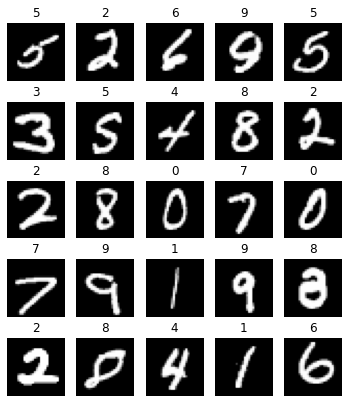

In [25]:
plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

### Часть 1: MNIST
Обучите полносвязную нейронную сеть с архитектурой 784-100-100-10 и сигмоидой в качестве нелинейности. Какую точность классификации удалось получить? Нарисуйте график сходимости на обучающей и тестовой выборках. В качестве темпа обучения (learning rate) возьмите 0.01

In [34]:
activation = ReLU()
#№activation = Sigmoid()

inner_dim = 64

layers = [Linear(784, inner_dim), activation]
for i in range(1):
    layers.extend([Linear(inner_dim, inner_dim), activation])

layers.append(Linear(inner_dim, 10))

net = NeuralNetwork(layers)
loss = NLLLoss()

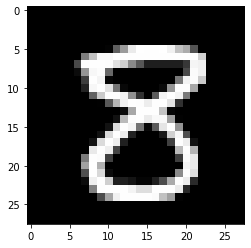

In [138]:
for X, y in train_loader:
    X = X.numpy()
    break
plt.imshow(X[0].reshape(28, 28), cmap=plt.cm.Greys_r)

In [139]:
x = net.forward(X[0].reshape(1, -1))[0]
order = np.argsort(x)[::-1]
print(order, x[order])

[6 9 0 3 5 1 2 4 7 8] [ 1.22344077e-04  6.70993560e-05  3.87820104e-05  4.30068636e-06
  1.82970643e-06 -1.17660681e-05 -1.81583435e-05 -3.29612825e-05
 -5.85718406e-05 -8.73675811e-05]


In [157]:
losses = []

## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    l = loss.forward(res, y)
    
    losses.append(l)
    
    dLdy = loss.backward()
    
    net.backward(dLdy)
    net.step(0.1)

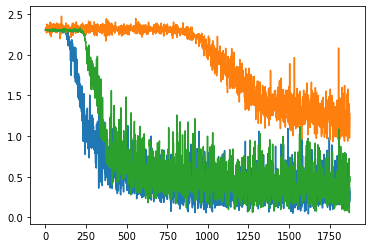

In [158]:
plt.plot(losses)
plt.plot(sigm_losses)
plt.plot(good_relu_losses)
plt.show()

In [89]:
good_relu_losses = losses

In [43]:
print(l)

0.7884153334874857


### Часть 2: Нелинейности

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

In [3]:
class ReLU:
    def __init__(self):
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.s = (X > 0).astype(float)*X
        return self.s
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        return (self.s > 0).astype(float)*dLdy
    
    def step(self, learning_rate):
        pass

In [67]:
x = np.array([1, 2])
(x > 1.5).astype(float)

array([0., 1.])

### Часть 3: Анализ ошибок
На каких объектах сеть ошибается больше всего?

In [159]:
errors = []

for X, y in test_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    
    for x_i, y_i in zip(X, y):
        l = loss.forward(x_i.reshape(1, -1), y_i.reshape(1, -1))
        errors.append((l, x_i.reshape(28, 28)))
    
    if len(errors) > 1000:
        break

In [163]:
errors.sort(key=lambda x: x[0], reverse=True)

In [195]:
print(errors[18][1])

[[-0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296 -0.42421296
  -0.42421

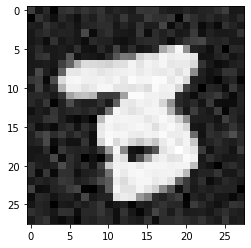

In [212]:
img = np.copy(errors[10][1])
img += np.random.randn(28*28).reshape(28, 28)*0.2
plt.imshow(img, cmap=plt.cm.Greys_r)
#print(errors[1000][0])

### HW1 (1 балл): Реализовать Tanh

In [119]:
class Tanh:
    def __init__(self):
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.s = 2/(1 + np.exp(-2*X)) - 1
        return self.s
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        return (1 - self.s**2)*dLdy
    
    def step(self, learning_rate):
        pass

In [6]:
activation = Tanh()

inner_dim = 64

layers = [Linear(784, inner_dim), activation]
for i in range(1):
    layers.extend([Linear(inner_dim, inner_dim), activation])

layers.append(Linear(inner_dim, 10))

net = NeuralNetwork(layers)
loss = NLLLoss()

In [9]:
losses = []

## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    l = loss.forward(res, y)
    
    losses.append(l)
    
    dLdy = loss.backward()
    
    net.backward(dLdy)
    net.step(0.1)

In [10]:
print(l)

0.25290817922634035


### Часть 4: Аугментация (HW, 2 балла)
* Небольшие вращения (-15, 15)
* Случайные сдвиги
* Шум

Какой прирост дают эти аугментации вместе и по отдельности

Сначала научимся делать эти преобразования

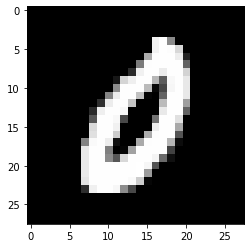

In [118]:
image = None
for X, y in train_loader:
    image = X[0]
    break
plt.imshow(image.reshape(28, 28), cmap=plt.cm.Greys_r)

4.892810403982622


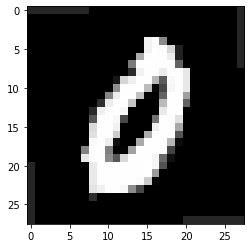

In [119]:
import torchvision.transforms.functional as TF
import random

angle = random.uniform(-15, 15)
print(angle)

rot_image = TF.rotate(image, angle)
plt.imshow(rot_image.numpy().reshape(28, 28), cmap=plt.cm.Greys_r)

1
2


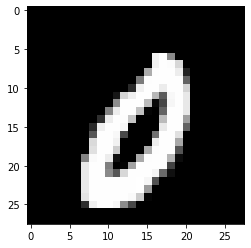

In [121]:
shift1 = random.randrange(-3,3)
shift2 = random.randrange(-3,3)
print(shift1)
print(shift2)

shift_image = torch.roll(image, shifts=(shift1, shift2), dims=(0, 1))
plt.imshow(shift_image.numpy().reshape(28, 28), cmap=plt.cm.Greys_r)

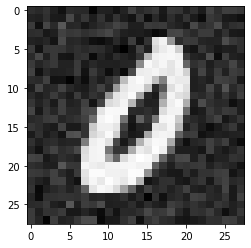

In [128]:
noise = torch.randn_like(image)*0.2
noise_image = image + noise
plt.imshow(noise_image.numpy().reshape(28, 28), cmap=plt.cm.Greys_r)

Сделаем в отдельности преобразования

Сначала вращения

In [106]:
import torchvision.transforms.functional as TF
import random

data = []

for X, y in train_dataset:
    angle = random.uniform(-15, 15)
    rot_X = TF.rotate(X, angle)
    X = X.numpy()
    rot_X = rot_X.numpy()
    data.append([X.ravel(), y])
    data.append([rot_X.ravel(), y])

In [107]:
train_loader = DataLoader(data, batch_size=32, shuffle=True)

activation = Tanh()

inner_dim = 64

layers = [Linear(784, inner_dim), activation]
for i in range(1):
    layers.extend([Linear(inner_dim, inner_dim), activation])

layers.append(Linear(inner_dim, 10))

net = NeuralNetwork(layers)
loss = NLLLoss()


In [108]:
losses = []

## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    l = loss.forward(res, y)
    
    losses.append(l)
    
    dLdy = loss.backward()
    
    net.backward(dLdy)
    net.step(0.1)

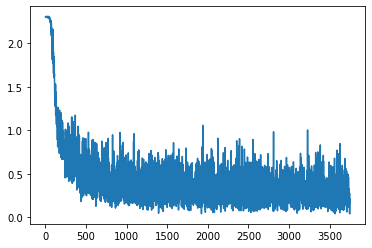

In [109]:
plt.plot(np.arange(len(losses)), losses)

In [110]:
print(l)

0.20815289094779227


Теперь сдвиги

0.3203984849172641


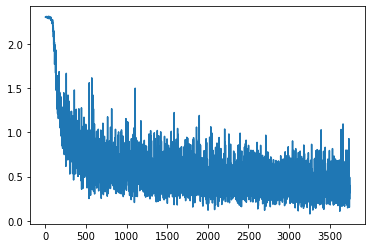

In [111]:
data = []

for X, y in train_dataset:
    shift1 = random.randrange(-3,3)
    shift2 = random.randrange(-3,3)
    shift_X = torch.roll(X, shifts=(shift1, shift2), dims=(0, 1))
    X = X.numpy()
    shift_X = shift_X.numpy()
    data.append([X.ravel(), y])
    data.append([shift_X.ravel(), y])
    

train_loader = DataLoader(data, batch_size=32, shuffle=True)

activation = Tanh()

inner_dim = 64

layers = [Linear(784, inner_dim), activation]
for i in range(1):
    layers.extend([Linear(inner_dim, inner_dim), activation])

layers.append(Linear(inner_dim, 10))

net = NeuralNetwork(layers)
loss = NLLLoss()


losses = []

## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    l = loss.forward(res, y)
    
    losses.append(l)
    
    dLdy = loss.backward()
    
    net.backward(dLdy)
    net.step(0.1)

plt.plot(np.arange(len(losses)), losses)
print(l)

Теперь шум

0.3526570951964122


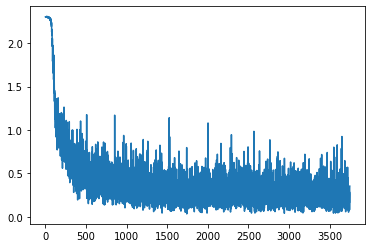

In [113]:
data = []

for X, y in train_dataset:
    noise = torch.randn_like(X)*0.2
    noise_X = X + noise
    X = X.numpy()
    noise_X = noise_X.numpy()
    data.append([X.ravel(), y])
    data.append([noise_X.ravel(), y])
    

train_loader = DataLoader(data, batch_size=32, shuffle=True)

activation = Tanh()

inner_dim = 64

layers = [Linear(784, inner_dim), activation]
for i in range(1):
    layers.extend([Linear(inner_dim, inner_dim), activation])

layers.append(Linear(inner_dim, 10))

net = NeuralNetwork(layers)
loss = NLLLoss()


losses = []

## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    l = loss.forward(res, y)
    
    losses.append(l)
    
    dLdy = loss.backward()
    
    net.backward(dLdy)
    net.step(0.1)

plt.plot(np.arange(len(losses)), losses)
print(l)

Ну а теперь всё вместе...

0.19980371435419567


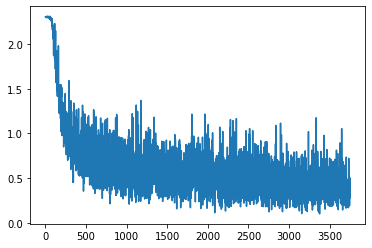

In [121]:
data = []

for X, y in train_dataset:
    
    angle = random.uniform(-15, 15)
    changed_X = TF.rotate(X, angle)
    
    shift1 = random.randrange(-3,3)
    shift2 = random.randrange(-3,3)
    changed_X = torch.roll(changed_X, shifts=(shift1, shift2), dims=(0, 1))
    
    noise = torch.randn_like(shifted_X)*0.2
    changed_X = changed_X + noise
    
    X = X.numpy()
    changed_X = changed_X.numpy()
    data.append([X.ravel(), y])
    data.append([changed_X.ravel(), y])
    

train_loader = DataLoader(data, batch_size=32, shuffle=True)

activation = Tanh()

inner_dim = 64

layers = [Linear(784, inner_dim), activation]
for i in range(1):
    layers.extend([Linear(inner_dim, inner_dim), activation])

layers.append(Linear(inner_dim, 10))

net = NeuralNetwork(layers)
loss = NLLLoss()


losses = []

## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    l = loss.forward(res, y)
    
    losses.append(l)
    
    dLdy = loss.backward()
    
    net.backward(dLdy)
    net.step(0.1)

plt.plot(np.arange(len(losses)), losses)
print(l)

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

0.34685390103251995


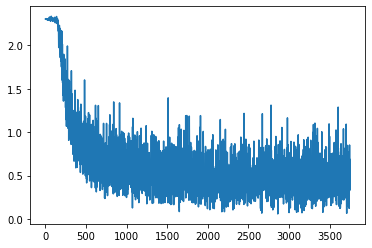

In [16]:
data = []

for X, y in train_dataset:
    
    angle = random.uniform(-15, 15)
    changed_X = TF.rotate(X, angle)
    
    shift1 = random.randrange(-3,3)
    shift2 = random.randrange(-3,3)
    changed_X = torch.roll(changed_X, shifts=(shift1, shift2), dims=(0, 1))
    
    noise = torch.randn_like(changed_X)*0.2
    changed_X = changed_X + noise
    
    X = X.numpy()
    changed_X = changed_X.numpy()
    data.append([X.ravel(), y])
    data.append([changed_X.ravel(), y])
    

train_loader = DataLoader(data, batch_size=32, shuffle=True)

activation = ReLU()

inner_dim = 64

layers = [Linear(784, inner_dim), activation]
for i in range(1):
    layers.extend([Linear(inner_dim, inner_dim), activation])

layers.append(Linear(inner_dim, 10))

net = NeuralNetwork(layers)
loss = NLLLoss()


losses = []

## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    l = loss.forward(res, y)
    
    losses.append(l)
    
    dLdy = loss.backward()
    
    net.backward(dLdy)
    net.step(0.1)

plt.plot(np.arange(len(losses)), losses)
print(l)

Реализовываем ELU с alpha = 1

In [20]:
class ELU:
    def __init__(self, alpha):
        self.alpha = alpha
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.s = self.alpha*(X < 0).astype(float)*(np.exp(X)-1) + (X >= 0).astype(float)*X
        return self.s
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        return ((self.s < 0).astype(float)*(self.s + self.alpha) + (self.s >= 0).astype(float))*dLdy
    
    def step(self, learning_rate):
        pass

0.12039463919273882


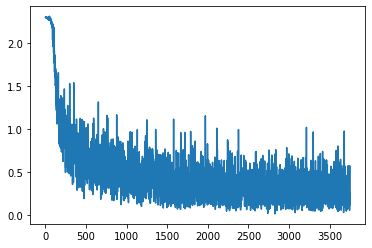

In [21]:
import torchvision.transforms.functional as TF
import random
import torch

data = []

for X, y in train_dataset:
    
    angle = random.uniform(-15, 15)
    changed_X = TF.rotate(X, angle)
    
    shift1 = random.randrange(-3,3)
    shift2 = random.randrange(-3,3)
    changed_X = torch.roll(changed_X, shifts=(shift1, shift2), dims=(0, 1))
    
    noise = torch.randn_like(changed_X)*0.2
    changed_X = changed_X + noise
    
    X = X.numpy()
    changed_X = changed_X.numpy()
    data.append([X.ravel(), y])
    data.append([changed_X.ravel(), y])
    

train_loader = DataLoader(data, batch_size=32, shuffle=True)

activation = ELU(alpha=1)

inner_dim = 64

layers = [Linear(784, inner_dim), activation]
for i in range(1):
    layers.extend([Linear(inner_dim, inner_dim), activation])

layers.append(Linear(inner_dim, 10))

net = NeuralNetwork(layers)
loss = NLLLoss()


losses = []

## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    res = net.forward(X)
    l = loss.forward(res, y)
    
    losses.append(l)
    
    dLdy = loss.backward()
    
    net.backward(dLdy)
    net.step(0.1)

plt.plot(np.arange(len(losses)), losses)
print(l)

### Часть 5: Выводы
Опишите полученные результаты: как влияют выбор нелинейности и предобработка данных на скорость сходимости и итоговое качество?

1. По поводу аугментации:

судя по графикам, более менее хорошей сходимости помогают добиться вращения и шум

2. По поводу нелинейности и предобработки данных:

(Графики похожи либо на саксофон, либо на лохнесское чудовище)

В случае ReLU мы наблюдаем более медленную сходимость, чем с Tanh и ELU.
ELU начинает почти сразу круто сходиться. Предобработка данных помогла получить более удобный вид для работы и с помощью аугментации помогла увеличить трэйн, поэтому в совокупности все данные действия помогли улучшить итоговое качество. (Быстрее всего сходится ELU)